In [1]:
import requests
import random
import json
import base64
from IPython.display import display, SVG
from urllib3.exceptions import InsecureRequestWarning

In [2]:
baseUrl = "https://demo.sunbirdrc.app.oci/registry"
apibaseUrl = "https://demo.sunbirdrc.app.oci/registry/api/v1/"
keycloakUrl = "https://demo.sunbirdrc.app.oci"
keycloak_url = "https://demo.sunbirdrc.app.oci"

#### Registry Health Check

In [5]:
headers = {
  'Content-Type': 'application/json'
}
# Suppress the warnings from urllib3
requests.packages.urllib3.disable_warnings(category=InsecureRequestWarning)

response = requests.request("GET", baseUrl + "/health", headers=headers, verify=False )

print(json.dumps(response.json(), indent=4))
assert response.status_code == 200

{
    "id": "sunbird-rc.registry.health",
    "ver": "1.0",
    "ets": 1710301479409,
    "params": {
        "resmsgid": "",
        "msgid": "2abd8343-e890-4579-9915-c67fdc7f59fa",
        "err": "",
        "status": "SUCCESSFUL",
        "errmsg": ""
    },
    "responseCode": "OK",
    "result": {
        "name": "sunbirdrc-registry-api",
        "healthy": false,
        "checks": [
            {
                "name": "DID_SERVICE",
                "healthy": false,
                "err": "",
                "errmsg": ""
            },
            {
                "name": "sunbird.keycloak.service",
                "healthy": true,
                "err": "",
                "errmsg": ""
            }
        ]
    }
}


#### admin token generation

In [56]:
# For admin token generation
headers = {
    'content-type': 'application/x-www-form-urlencoded',
}

userId = 'admin'

data = {
  'client_id': 'registry-frontend',
  'username': userId,
  'password': 'abcd@123',
  'grant_type': 'password'
}
# Suppress the warnings from urllib3
requests.packages.urllib3.disable_warnings(category=InsecureRequestWarning)

response = requests.post('%s/auth/realms/sunbird-rc/protocol/openid-connect/token'%(keycloakUrl), headers=headers, data=data,verify=False)
token = response.json()["access_token"]
print(token)

eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJXM3U1Y2JKVVFXbTdOaTNrNWRhWXFFdVFtdG9OSGY1M21YMDZoSllJM2YwIn0.eyJleHAiOjE3MTAyODkzNjUsImlhdCI6MTcxMDI4ODc2NSwianRpIjoiM2MyMTcwMTAtYjdiOC00MWM1LWIzMmYtNmE3MjMxYWFmNDIzIiwiaXNzIjoiaHR0cHM6Ly9kZW1vLnN1bmJpcmRyYy5hcHAub2NpL2F1dGgvcmVhbG1zL3N1bmJpcmQtcmMiLCJhdWQiOiJhY2NvdW50Iiwic3ViIjoiM2E5OWVjMTctMDFiZS00NjdiLTg1MmYtOGJiODMwNmFjNjE2IiwidHlwIjoiQmVhcmVyIiwiYXpwIjoicmVnaXN0cnktZnJvbnRlbmQiLCJzZXNzaW9uX3N0YXRlIjoiNGE5NGM5MTYtNjE0NS00ZDAyLWFhMWMtZDE0MWNiNmZmNmFjIiwiYWNyIjoiMSIsImFsbG93ZWQtb3JpZ2lucyI6WyJodHRwczovL2xvY2FsaG9zdDo0MjAyIiwiaHR0cDovL2xvY2FsaG9zdDo0MjAyIiwiaHR0cHM6Ly9kZW1vLnN1bmJpcmRyYy5hcHAub2NpIiwiaHR0cHM6Ly9sb2NhbGhvc3Q6NDIwMCIsImh0dHBzOi8vbmRlYXIueGl2LmluIiwiaHR0cDovL2xvY2FsaG9zdDo0MjAwIiwiaHR0cDovLzIwLjE5OC42NC4xMjgiXSwicmVhbG1fYWNjZXNzIjp7InJvbGVzIjpbIm9mZmxpbmVfYWNjZXNzIiwiYWRtaW4iLCJ1bWFfYXV0aG9yaXphdGlvbiIsImRlZmF1bHQtcm9sZXMtbmRlYXIiXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpbIm1hbmFnZS1hY2NvdW50IiwibWFuYWdlLWFj

#### Create Official

In [50]:
#create issuer
issuerUserId = "rto_official_4"
def createIssuer():
    payload = json.dumps({
      "name": "RTO Karnataka",
      "accountDetails": {
        "userId": issuerUserId
      },
      "contactDetails": {
        "email": issuerUserId
      }
    })
    headers = {
        'Content-Type': 'application/json',
        'Authorization': 'Bearer %s'%token
    }
    # Suppress the warnings from urllib3
    requests.packages.urllib3.disable_warnings(category=InsecureRequestWarning)
    response = requests.post('%s/api/v1/Official/invite'%(baseUrl), headers=headers, data=payload,verify=False)
    print(response.json())
    return response.json()["result"]['Official']["osid"]

    
issuerId = createIssuer()



ConnectionError: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))

#### Get Official/Issuer Token

In [143]:
#get issuer token
headers = {
    'content-type': 'application/x-www-form-urlencoded',
}
issuerUserId = "rto_official_1"
data = {
  'client_id': 'registry-frontend',
  'username': issuerUserId,
  'password': 'abcd@123',
  'grant_type': 'password'
}

response = requests.post('%s/auth/realms/sunbird-rc/protocol/openid-connect/token'%(keycloakUrl), headers=headers, data=data)
issuerToken = response.json()["access_token"]
print(issuerToken)

eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJVQkNsY1Z2NFM0bWw4bkh4WDlnb2tpWUFpck1fSWxEb0c2UDNFaEN6dkZZIn0.eyJleHAiOjE2OTAyNDkwNjQsImlhdCI6MTY5MDI0ODQ2NCwianRpIjoiNTNlNWNjMWItOGE3Yi00YTc3LTlhNGEtMzZmMjU1MTY1NzZhIiwiaXNzIjoiaHR0cDovL2RlbW8tYWRtaW4tcG9ydGFsLnN1bmJpcmRyYy5vY2kvYXV0aC9yZWFsbXMvc3VuYmlyZC1yYyIsImF1ZCI6ImFjY291bnQiLCJzdWIiOiJlMWU4MDU0OC05NGJkLTQ2NjktODhiZS1kY2Q0YTJjMTlhOGYiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWdpc3RyeS1mcm9udGVuZCIsInNlc3Npb25fc3RhdGUiOiJmNmI5NzkwNS05ZGIwLTQwZTQtYWI5OS05NjQ5MDBkN2RkZDciLCJhY3IiOiIxIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwczovL2xvY2FsaG9zdDo0MjAwIiwiaHR0cHM6Ly9uZGVhci54aXYuaW4iLCJodHRwOi8vZGVtby1hZG1pbi1wb3J0YWwuc3VuYmlyZHJjLm9jaSIsImh0dHA6Ly9sb2NhbGhvc3Q6NDIwMCIsImh0dHA6Ly8yMC4xOTguNjQuMTI4Il0sInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJPZmZpY2lhbCIsIm9mZmxpbmVfYWNjZXNzIiwiYWRtaW4iLCJ1bWFfYXV0aG9yaXphdGlvbiIsImRlZmF1bHQtcm9sZXMtbmRlYXIiXX0sInJlc291cmNlX2FjY2VzcyI6eyJhY2NvdW50Ijp7InJvbGVzIjpb

#### Get official details

In [144]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%issuerToken
}

response = requests.request("GET", apibaseUrl + "Official", headers=headers)

print(response.text)
issuerId = response.json()[0]["osid"]
print(issuerId)
assert response.status_code == 200

[{"osUpdatedAt":"2023-07-25T01:27:42.662Z","osCreatedAt":"2023-07-25T01:27:42.662Z","osUpdatedBy":"","contactDetails":{"osid":"1-ae21761f-3150-4fa1-aefe-62f996543cd4","osUpdatedAt":"2023-07-25T01:27:42.662Z","osCreatedAt":"2023-07-25T01:27:42.662Z","osUpdatedBy":"","osCreatedBy":"","email":"rto_official_1"},"name":"RTO Karnataka","osCreatedBy":"","osid":"1-2a895d6c-90c1-4d18-ba83-2a60a1e9cfba","accountDetails":{"osid":"1-78dd75d4-a978-4d8c-a3d7-e75116328632","osUpdatedAt":"2023-07-25T01:27:42.662Z","osCreatedAt":"2023-07-25T01:27:42.662Z","osUpdatedBy":"","osCreatedBy":"","userId":"rto_official_1"},"osOwner":["e1e80548-94bd-4669-88be-dcd4a2c19a8f"]}]
1-2a895d6c-90c1-4d18-ba83-2a60a1e9cfba


#### Upload Certificate Template

In [145]:
def uploadTemplate(entityName, entityId):
    payload = {}
    files=[
      ('files',('registrationcertificate.svg',open('./schema_templates/registrationcertificate.svg','rb'),'image/svg+xml'))
    ]
    headers = {
        'Authorization': 'Bearer %s'%issuerToken
    }
    response = requests.post('%s/api/v1/%s/%s/templates/documents'%(baseUrl, entityName, entityId), headers=headers, data=payload, files=files)
    print(json.dumps(response.json(), indent=4))
    return response.json()['documentLocations'][0]
templateUrl = uploadTemplate('Official', issuerId)

{
    "documentLocations": [
        "Official/1-2a895d6c-90c1-4d18-ba83-2a60a1e9cfba/templates/documents/05332fbd-e268-4a72-b0d8-e95d6e839bd2-registrationcertificate.svg"
    ],
    "errors": []
}


In [146]:
# Show template url
print(templateUrl)

Official/1-2a895d6c-90c1-4d18-ba83-2a60a1e9cfba/templates/documents/05332fbd-e268-4a72-b0d8-e95d6e839bd2-registrationcertificate.svg


In [147]:
schemaName = "VehicleCertificate"
def getSchemaBody(templateUrl):
    return {
      "name": schemaName,
      "schema": "{\"$schema\":\"http://json-schema.org/draft-07/schema\",\"type\":\"object\",\"properties\":{\"VehicleCertificate\":{\"$ref\":\"#/definitions/VehicleCertificate\"}},\"required\":[\"VehicleCertificate\"],\"title\":\"VehicleCertificate\",\"definitions\":{\"VehicleCertificate\":{\"$id\":\"#/properties/VehicleCertificate\",\"type\":\"object\",\"title\":\"The VehicleCertificate Schema\",\"required\":[\"regnumber\",\"mnfyear\",\"dateofaward\",\"nameofScheme\",\"name\"],\"properties\":{\"name\":{\"type\":\"string\",\"title\":\"Name\"},\"dateofaward\":{\"type\":\"string\",\"title\":\"Date Of Award\",\"format\":\"date\"},\"nameofScheme\":{\"type\":\"string\",\"title\":\"Name of Scheme\"},\"regnumber\":{\"type\":\"string\",\"title\":\"Vehicle Registration Number\"},\"mnfyear\":{\"type\":\"string\",\"title\":\"Manufacturing year\"}}}},\"_osConfig\":{\"uniqueIndexFields\":[],\"privateFields\":[],\"privateFieldConfig\":\"HASH\",\"internalFieldConfig\":\"FULL\",\"systemFields\":[\"osCreatedAt\",\"osUpdatedAt\",\"osCreatedBy\",\"osUpdatedBy\"],\"roles\":[\"Official\"],\"inviteRoles\":[\"anonymous\"],\"credentialTemplate\":{\"@context\":[\"https://www.w3.org/2018/credentials/v1\",\"https://gist.githubusercontent.com/ddevadat/4bb88499cf374f7ba8d1c9138f52eb67/raw/7c62ff3d2af28e1abc6dfcc2c95b89a97c029554/vehiclecertificate_ct.json\"],\"type\":[\"VerifiableCredential\"],\"issuanceDate\":\"{{osCreatedAt}}\",\"credentialSubject\":{\"type\":\"Vehicle\",\"name\":\"{{name}}\",\"mnfyear\":\"{{mnfyear}}\",\"regnumber\":\"{{regnumber}}\"},\"evidence\":{\"type\":\"Registration\",\"nameofScheme\":\"{{nameofScheme}}\",\"dateofaward\":\"{{dateofaward}}\"},\"issuer\":\"did:web:sunbirdrc.dev/vc/Official\"},\"certificateTemplates\":{\"html\":\"minio://%s\"}}}"%(templateUrl),
      "status": "PUBLISHED"
    }

#### Create the VC schema

In [148]:
# create a schema
headers = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer %s'%issuerToken, 
}
entity_name = 'Schema'
data = getSchemaBody(templateUrl)
response = requests.post('%s/api/v1/%s'%(baseUrl, entity_name), headers=headers, json=data)
print(response.status_code)
print(response.json())
schemaOsid = response.json()["result"]['Schema']["osid"]
print(schemaOsid)

200
{'id': 'sunbird-rc.registry.create', 'ver': '1.0', 'ets': 1690248477702, 'params': {'resmsgid': '', 'msgid': '1d8a93ae-fdc6-4b60-b037-31c57711facd', 'err': '', 'status': 'SUCCESSFUL', 'errmsg': ''}, 'responseCode': 'OK', 'result': {'Schema': {'osid': '1-91365520-4594-4b2f-a03e-fb09c48f671e'}}}
1-91365520-4594-4b2f-a03e-fb09c48f671e


#### Onboard Citizen 1

In [58]:
### Code for inviting citizen

citizenUserId = "zcrawley@gmail.com"
citizenRequestBody = {
    "name": "Zak Crawley",
    "email": citizenUserId,
    "dob": "2000-10-10",
    "gender": "Male"
}

headers = {
  'Content-Type': 'application/json'
}
# Suppress the warnings from urllib3
requests.packages.urllib3.disable_warnings(category=InsecureRequestWarning)
response = requests.request("POST", apibaseUrl + "CitizenV2/invite", headers=headers, json=citizenRequestBody,verify=False)

print(response.text)
assert response.status_code == 200

{"id":"sunbird-rc.registry.invite","ver":"1.0","ets":1710288838857,"params":{"resmsgid":"","msgid":"412c433a-3117-4914-9c57-a5404c63ba7d","err":"","status":"SUCCESSFUL","errmsg":""},"responseCode":"OK","result":{"CitizenV2":{"osid":"1-5948a572-986c-451a-aca8-a231a6eb7091"}}}


#### Get Citizen1 Token

In [59]:
citizenUserId = "zcrawley@gmail.com"

In [61]:
def getToken(userId):
    headers = {
        'content-type': 'application/x-www-form-urlencoded',
    }

    data = {
      'client_id': 'registry-frontend',
      'username': userId,
      'password': 'abcd@123',
      'grant_type': 'password'
    }
    # Suppress the warnings from urllib3
    requests.packages.urllib3.disable_warnings(category=InsecureRequestWarning)
    response = requests.post('%s/auth/realms/sunbird-rc/protocol/openid-connect/token'%(keycloakUrl), headers=headers, data=data,verify=False)
    print(response.status_code)
    print(response.json())
    citizentoken = response.json()["access_token"]
    return citizentoken

citizen1token = getToken(citizenUserId)
print(citizen1token)

ConnectionError: ('Connection aborted.', ConnectionResetError(104, 'Connection reset by peer'))

#### Get Citizen1 Details

In [152]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%citizen1token
}

response = requests.request("GET", apibaseUrl + "CitizenV2", headers=headers)

print(response.text)
citizen1Osid = response.json()[0]["osid"]
citizen1Name = response.json()[0]["name"]
citizen1Email = response.json()[0]["email"]
print(citizen1Osid)
print(citizen1Name)
print(citizen1Email)
assert response.status_code == 200

[{"osUpdatedAt":"2023-07-25T01:28:00.362Z","gender":"Male","osCreatedAt":"2023-07-25T01:28:00.362Z","osUpdatedBy":"","dob":"2000-10-10","name":"Zak Crawley","osCreatedBy":"","osid":"1-e5282f0e-57ae-47f8-ab3a-e73c5cb1b228","osOwner":["2c4f0e55-3a31-4ade-9b51-5a3fe1c56886"],"email":"zcrawley@gmail.com"}]
1-e5282f0e-57ae-47f8-ab3a-e73c5cb1b228
Zak Crawley
zcrawley@gmail.com


#### Official Adds Vehicle and assigns to Citizen1

In [153]:
### Code for adding vehicle

vehicleRegNumber = "ECB73D2"
vehicleRequestBody = {
    "regnumber": vehicleRegNumber,
    "mnfyear": "2022",
    "vehicletype": "Car",
    "owner": 
      {
      "citizenOSID": citizen1Osid,
      "citizenName": citizen1Name,
      "citizenEmail": citizen1Email
      }
    
}

headers = {
  'Content-Type': 'application/json',
  'Authorization': 'bearer %s'%issuerToken
}

response = requests.request("POST", apibaseUrl + "VehicleV2/invite", headers=headers, json=vehicleRequestBody)

print(response.text)
assert response.status_code == 200


{"id":"sunbird-rc.registry.invite","ver":"1.0","ets":1690248491292,"params":{"resmsgid":"","msgid":"ac07839f-9b49-4134-9ddd-bf0e72a86edf","err":"","status":"SUCCESSFUL","errmsg":""},"responseCode":"OK","result":{"VehicleV2":{"osid":"1-810074dc-a611-4447-bdff-55c83fba3312"}}}


#### Search Vehicle Details by vehicle reg number

In [154]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%issuerToken
}
vehicleSearchBody = {
    "filters": {
        "regnumber": {
            "contains": vehicleRegNumber
        }
    },
    "limit": 5,
    "offset": 0
}

response = requests.request("POST", apibaseUrl + "VehicleV2/search", headers=headers,json=vehicleSearchBody)

print(json.dumps(response.json(), indent=4))
vehicleOsid = response.json()[0]["osid"]
print(vehicleOsid)
assert response.status_code == 200

[
    {
        "regnumber": "ECB73D2",
        "mnfyear": "2022",
        "vehicletype": "Car",
        "owner": {
            "citizenOSID": "1-e5282f0e-57ae-47f8-ab3a-e73c5cb1b228",
            "citizenName": "Zak Crawley",
            "citizenEmail": "zcrawley@gmail.com",
            "osCreatedAt": "2023-07-25T01:28:11.341Z",
            "osUpdatedAt": "2023-07-25T01:28:11.341Z",
            "osCreatedBy": "",
            "osUpdatedBy": "",
            "osid": "1-98f9ca53-56f9-47af-9f9b-85128a50b995"
        },
        "osCreatedAt": "2023-07-25T01:28:11.341Z",
        "osUpdatedAt": "2023-07-25T01:28:11.341Z",
        "osCreatedBy": "",
        "osUpdatedBy": "",
        "osid": "1-810074dc-a611-4447-bdff-55c83fba3312"
    }
]
1-810074dc-a611-4447-bdff-55c83fba3312


#### Official Create a VC for Citizen1

In [155]:
# create a credential
headers = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer %s'%issuerToken, 
}
data = {
    "name": "Zak Crawley",
    "regnumber": "ECB73D2",
    "dateofaward": "2023-04-20",
    "nameofScheme": "Vehicle Registration",
    "mnfyear": "2022"

}
response = requests.post('%s/api/v1/%s'%(baseUrl, schemaName), headers=headers, json=data)
print(response.status_code)
print(schemaName)
credentialOsid = response.json()["result"]['VehicleCertificate']["osid"]
print(credentialOsid)

200
VehicleCertificate
1-cc22d105-4b5b-4144-aa9c-2936577f262b


#### Official Views the Issued VC

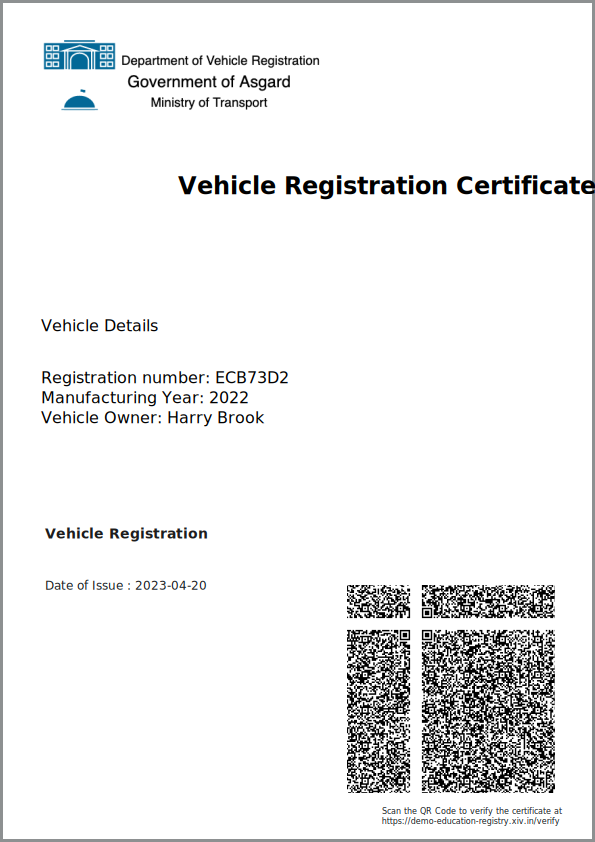

In [165]:
#get a credential
# credentialOsid='1-2ffb8f5c-ec51-47f3-8b26-0796a8328803'
schemaName = "VehicleCertificate"
headers = {
    'Accept': 'image/svg+xml',
    'Authorization': 'Bearer %s'%issuerToken,
    "template-key": "html"
}
response = requests.get('%s/api/v1/%s/%s'%(baseUrl, schemaName, credentialOsid), headers=headers)
display(SVG(response.content))

#### Onboard Citizen 2

In [157]:
## Code for inviting citizen

citizen2UserId = "hbrook@gmail.com"
citizenRequestBody = {
    "name": "Harry Brook",
    "email": citizen2UserId,
    "dob": "2001-10-10",
    "gender": "Male"
}

headers = {
  'Content-Type': 'application/json'
}

response = requests.request("POST", apibaseUrl + "CitizenV2/invite", headers=headers, json=citizenRequestBody)

print(response.text)
assert response.status_code == 200

{"id":"sunbird-rc.registry.invite","ver":"1.0","ets":1690248776581,"params":{"resmsgid":"","msgid":"ff67f9a2-a355-4993-8de8-13642a69aab5","err":"","status":"SUCCESSFUL","errmsg":""},"responseCode":"OK","result":{"CitizenV2":{"osid":"1-e5ee312f-4a20-4c47-a8a8-6b9f72d8f4ec"}}}


#### Get Citizen 2 Token

In [158]:
citizen2token = getToken(citizen2UserId)
print(citizen2token)

200
eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJVQkNsY1Z2NFM0bWw4bkh4WDlnb2tpWUFpck1fSWxEb0c2UDNFaEN6dkZZIn0.eyJleHAiOjE2OTAyNDkzNzksImlhdCI6MTY5MDI0ODc3OSwianRpIjoiMDI4M2FkOGMtOWVhNy00MTMzLWFkMzAtNmU4NGUxNjZmNTJjIiwiaXNzIjoiaHR0cDovL2RlbW8tYWRtaW4tcG9ydGFsLnN1bmJpcmRyYy5vY2kvYXV0aC9yZWFsbXMvc3VuYmlyZC1yYyIsImF1ZCI6ImFjY291bnQiLCJzdWIiOiJhNDFlODMyMi05NzM1LTRjZDctOWQzYS1mYjE1NDM3MGUwMjIiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJyZWdpc3RyeS1mcm9udGVuZCIsInNlc3Npb25fc3RhdGUiOiI5ZWJjM2Q1MC1jODRkLTQzODQtOGJjNC1kMGYwOTYwNzI1N2UiLCJhY3IiOiIxIiwiYWxsb3dlZC1vcmlnaW5zIjpbImh0dHBzOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwOi8vbG9jYWxob3N0OjQyMDIiLCJodHRwczovL2xvY2FsaG9zdDo0MjAwIiwiaHR0cHM6Ly9uZGVhci54aXYuaW4iLCJodHRwOi8vZGVtby1hZG1pbi1wb3J0YWwuc3VuYmlyZHJjLm9jaSIsImh0dHA6Ly9sb2NhbGhvc3Q6NDIwMCIsImh0dHA6Ly8yMC4xOTguNjQuMTI4Il0sInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIiwiZGVmYXVsdC1yb2xlcy1uZGVhciIsIkNpdGl6ZW5WMiJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFu

#### Get Citizen 2 Details

In [159]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%citizen2token
}

response = requests.request("GET", apibaseUrl + "CitizenV2", headers=headers)

print(response.text)
citizen2Osid = response.json()[0]["osid"]
citizen2Name = response.json()[0]["name"]
citizen2Email = response.json()[0]["email"]
print(citizen2Osid)
print(citizen2Name)
print(citizen2Email)
assert response.status_code == 200

[{"osUpdatedAt":"2023-07-25T01:32:56.740Z","gender":"Male","osCreatedAt":"2023-07-25T01:32:56.740Z","osUpdatedBy":"","dob":"2001-10-10","name":"Harry Brook","osCreatedBy":"","osid":"1-e5ee312f-4a20-4c47-a8a8-6b9f72d8f4ec","osOwner":["a41e8322-9735-4cd7-9d3a-fb154370e022"],"email":"hbrook@gmail.com"}]
1-e5ee312f-4a20-4c47-a8a8-6b9f72d8f4ec
Harry Brook
hbrook@gmail.com


#### Official Transfers vehicle to citizen2

In [160]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%issuerToken
}

vehicleUpdateBody = {
    "owner":
      {
      "citizenOSID": citizen2Osid,
      "citizenName": citizen2Name,
      "citizenEmail": citizen2Email
      }

}


response = requests.request("PUT", apibaseUrl + "VehicleV2/" + vehicleOsid, headers=headers, json=vehicleUpdateBody)

print(response.text)
assert response.status_code == 200

{"id":"sunbird-rc.registry.update","ver":"1.0","ets":1690248794487,"params":{"resmsgid":"","msgid":"cbc23e0e-1c85-49c4-9565-ad7994d34df3","err":"","status":"SUCCESSFUL","errmsg":""},"responseCode":"OK"}


#### Check the owner details is now citizen2

In [162]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%issuerToken
}
vehicleSearchBody = {
    "filters": {
        "regnumber": {
            "contains": vehicleRegNumber
        }
    },
    "limit": 5,
    "offset": 0
}

response = requests.request("POST", apibaseUrl + "VehicleV2/search", headers=headers,json=vehicleSearchBody)

print(json.dumps(response.json(), indent=4))
vehicleOsid = response.json()[0]["osid"]
print(vehicleOsid)
assert response.status_code == 200

[
    {
        "regnumber": "ECB73D2",
        "mnfyear": "2022",
        "vehicletype": "Car",
        "owner": {
            "citizenOSID": "1-e5ee312f-4a20-4c47-a8a8-6b9f72d8f4ec",
            "citizenName": "Harry Brook",
            "citizenEmail": "hbrook@gmail.com",
            "osCreatedAt": "2023-07-25T01:28:11.341Z",
            "osUpdatedAt": "2023-07-25T01:33:14.510Z",
            "osCreatedBy": "",
            "osUpdatedBy": "e1e80548-94bd-4669-88be-dcd4a2c19a8f",
            "osid": "1-98f9ca53-56f9-47af-9f9b-85128a50b995",
            "@type": "owner"
        },
        "osCreatedAt": "2023-07-25T01:28:11.341Z",
        "osUpdatedAt": "2023-07-25T01:33:14.510Z",
        "osCreatedBy": "",
        "osUpdatedBy": "e1e80548-94bd-4669-88be-dcd4a2c19a8f",
        "osid": "1-810074dc-a611-4447-bdff-55c83fba3312",
        "@type": "VehicleV2"
    }
]
1-810074dc-a611-4447-bdff-55c83fba3312


#### Official Updates VC for citizen2

In [163]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%issuerToken
}

VCUpdateBody = {
    "name": "Harry Brook",
    "regnumber": "ECB73D2",
    "dateofaward": "2023-04-20",
    "nameofScheme": "Vehicle Registration",
    "mnfyear": "2022"
}


response = requests.request("PUT", apibaseUrl + "VehicleCertificate/" + credentialOsid, headers=headers, json=VCUpdateBody)

print(response.text)
assert response.status_code == 200

{"id":"sunbird-rc.registry.update","ver":"1.0","ets":1690248864627,"params":{"resmsgid":"","msgid":"ab824fd9-45f7-4809-9ba6-d6746fe30bf2","err":"","status":"SUCCESSFUL","errmsg":""},"responseCode":"OK"}


#### Official view the new VC

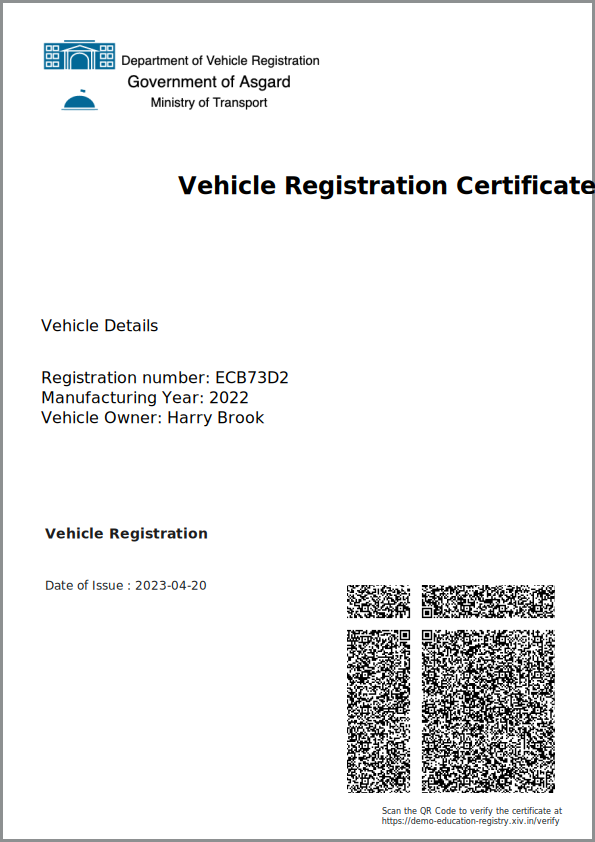

In [164]:
schemaName = "VehicleCertificate"
headers = {
    'Accept': 'image/svg+xml',
    'Authorization': 'Bearer %s'%issuerToken,
    "template-key": "html"
}
response = requests.get('%s/api/v1/%s/%s'%(baseUrl, schemaName, credentialOsid), headers=headers)
display(SVG(response.content))

### Optional attestation workflow

##### Citizen 1 adds license details

In [166]:

headers = {
    'content-type': 'application/json',
    'authorization': 'bearer %s'%citizen1token,
}

data = """{
"drivinglicense": [
  {
    "vehicletype": "Car",
    "licnumber": "abcde1234",
    "issueddate":  "2000-10-10",
    "validupto": "2010-10-10",
    "state": "Karnataka"
  }
]
}"""
# print(data)
response = requests.put('%sCitizenV2/%s'%(apibaseUrl, citizen1Osid), headers=headers, data=data)
print(response)
print(response.json())
assert response.status_code == 200


headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%citizen1token,
}

response = requests.request("GET", apibaseUrl + "CitizenV2", headers=headers)

# print(response.text)
drivinglicenseOsid = response.json()[0]["drivinglicense"][0]["osid"]
print(drivinglicenseOsid)
assert response.status_code == 200


<Response [200]>
{'id': 'sunbird-rc.registry.update', 'ver': '1.0', 'ets': 1690248960377, 'params': {'resmsgid': '', 'msgid': 'ecb4f1d1-a6a7-4ed5-8c8c-8ddb7d2bbcab', 'err': '', 'status': 'SUCCESSFUL', 'errmsg': ''}, 'responseCode': 'OK'}
1-24672fdd-4a47-4dd3-92dd-42618df5adf8


#### Get Citizen1 details after adding license

In [167]:
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%citizen1token
}

response = requests.request("GET", apibaseUrl + "CitizenV2", headers=headers)
print(json.dumps(response.json(), indent=4))
assert response.status_code == 200

[
    {
        "osUpdatedAt": "2023-07-25T01:36:00.646Z",
        "gender": "Male",
        "osCreatedAt": "2023-07-25T01:28:00.362Z",
        "osUpdatedBy": "2c4f0e55-3a31-4ade-9b51-5a3fe1c56886",
        "dob": "2000-10-10",
        "drivinglicense": [
            {
                "vehicletype": "Car",
                "validupto": "2010-10-10",
                "osUpdatedAt": "2023-07-25T01:36:00.646Z",
                "licnumber": "abcde1234",
                "osUpdatedBy": "2c4f0e55-3a31-4ade-9b51-5a3fe1c56886",
                "osid": "1-24672fdd-4a47-4dd3-92dd-42618df5adf8",
                "state": "Karnataka",
                "issueddate": "2000-10-10"
            }
        ],
        "osCreatedBy": "",
        "name": "Zak Crawley",
        "osid": "1-e5282f0e-57ae-47f8-ab3a-e73c5cb1b228",
        "osOwner": [
            "2c4f0e55-3a31-4ade-9b51-5a3fe1c56886"
        ],
        "email": "zcrawley@gmail.com"
    }
]


#### Citizen 1 Sends License attestation request

In [168]:
# raise attestation request
headers = {
    'content-type': 'application/json',
    'authorization': 'bearer %s'%citizen1token,
}

params = (
    ('send', 'true'),
)

data = {
    "entityName":"CitizenV2",
    "entityId":"%s"%citizen1Osid,
    "name":"CitizenAffiliation",
    "propertiesOSID": {
        "drivinglicense": [drivinglicenseOsid]
    }
}
response = requests.put(apibaseUrl+'send', headers=headers, params=params, json=data)
print(response.status_code)
assert response.status_code == 200
print(json.dumps(response.json(), indent=4))
citizen1attestationosid=response.json()["result"]["attestationOSID"]
assert response.json()["params"]["status"] == "SUCCESSFUL"

200
{
    "id": "sunbird-rc.registry.send",
    "ver": "1.0",
    "ets": 1690248970776,
    "params": {
        "resmsgid": "",
        "msgid": "2fac2a81-7441-4dbe-b03a-543d2d3d0ceb",
        "err": "",
        "status": "SUCCESSFUL",
        "errmsg": ""
    },
    "responseCode": "OK",
    "result": {
        "attestationOSID": "1-cac8fef4-d48a-4d44-bf76-149d1c1ff94e"
    }
}


#### Official gets all claims

In [169]:
# get claims for official

officialUserId = "rto_official_1"
officialToken = getToken(officialUserId)
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%officialToken,
}

response = requests.request("GET", apibaseUrl + "Official/claims", headers=headers)
assert response.status_code == 200

print(json.dumps(response.json(), indent=4))


200
{
    "totalPages": 1,
    "content": [
        {
            "id": "50a6f9a4-a3e2-4419-bef5-07282b02a51a",
            "entity": "CitizenV2",
            "entityId": "1-e5282f0e-57ae-47f8-ab3a-e73c5cb1b228",
            "propertyURI": "",
            "createdAt": "2023-07-25T01:36:11.195+00:00",
            "updatedAt": "2023-07-25T01:36:11.195+00:00",
            "attestedOn": null,
            "status": "OPEN",
            "conditions": "(ATTESTOR#$.[*]#.contains('RTO Karnataka'))",
            "attestorEntity": "Official",
            "requestorName": "zcrawley@gmail.com",
            "propertyData": "{\"drivinglicense\":[{\"vehicletype\":\"Car\",\"validupto\":\"2010-10-10\",\"osUpdatedAt\":\"2023-07-25T01:36:00.646Z\",\"licnumber\":\"abcde1234\",\"osUpdatedBy\":\"2c4f0e55-3a31-4ade-9b51-5a3fe1c56886\",\"osid\":\"1-24672fdd-4a47-4dd3-92dd-42618df5adf8\",\"state\":\"Karnataka\",\"issueddate\":\"2000-10-10\"}],\"name\":\"Zak Crawley\"}",
            "attestationId": "1-cac8fef4-d

#### Official Grants Citizen1 Claim

In [170]:

# Attesting the claim as GRANT
data = {
    "action":"GRANT_CLAIM",
}
attestingClaimId = None
for claim in response.json()["content"]:
    if claim["status"] == "OPEN" and claim["attestationId"] == citizen1attestationosid:
        attestingClaimId = claim["id"]
        print(claim["id"])
        attestResp = requests.request("POST", "%sOfficial/claims/%s/attest" %(apibaseUrl, claim["id"]), headers=headers, json=data)
        assert response.status_code == 200
        print(attestResp)
        print(attestResp.json())
        break
assert attestingClaimId != None



50a6f9a4-a3e2-4419-bef5-07282b02a51a
<Response [200]>
{'resmsgid': '', 'msgid': '4e31449e-36f8-43ec-a45c-0f5de1a3e5c3', 'err': '', 'status': 'SUCCESSFUL', 'errmsg': ''}


#### Citizen 1 get attestation status

In [171]:
import time
time.sleep(5)
# verify attestation status
headers = {
  'Content-Type': 'application/json',
    'Authorization': 'bearer %s'%citizen1token,
}

response = requests.request("GET", apibaseUrl + "CitizenV2", headers=headers)

print(json.dumps(response.json(), indent=4))
for affiliation in response.json()[0]["CitizenAffiliation"]:
        if affiliation["_osClaimId"] == attestingClaimId:
            assert affiliation["_osState"] == "PUBLISHED"

[
    {
        "osUpdatedAt": "2023-07-25T01:36:17.685Z",
        "gender": "Male",
        "osUpdatedBy": "",
        "drivinglicense": [
            {
                "vehicletype": "Car",
                "validupto": "2010-10-10",
                "osUpdatedAt": "2023-07-25T01:36:17.685Z",
                "licnumber": "abcde1234",
                "osUpdatedBy": "",
                "osid": "1-24672fdd-4a47-4dd3-92dd-42618df5adf8",
                "state": "Karnataka",
                "issueddate": "2000-10-10"
            }
        ],
        "osid": "1-e5282f0e-57ae-47f8-ab3a-e73c5cb1b228",
        "osOwner": [
            "2c4f0e55-3a31-4ade-9b51-5a3fe1c56886"
        ],
        "osCreatedAt": "2023-07-25T01:28:00.362Z",
        "CitizenAffiliation": [
            {
                "osUpdatedAt": "2023-07-25T01:36:17.685Z",
                "osUpdatedBy": "",
                "_osState": "PUBLISHED",
                "entityId": "1-e5282f0e-57ae-47f8-ab3a-e73c5cb1b228",
              